<a href="https://www.kaggle.com/code/actuaryabhishekroy/titanic-rfc-0-77990?scriptVersionId=193011058" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Importing Libraries to play with the data:)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Libraries for developing the Model
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_auc_score

# To remove warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
data_train = pd.read_csv("../input/titanic/train.csv")
data_test = pd.read_csv("../input/titanic/test.csv")

# Exploratory Data Analysis

In [4]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Note:
- There are missing values in Age and Embarked of data_train dataset. We will treat it accordingly.
- There are missing values in Age and Fare of data_test dataset. We will treat it accordingly.
- Cabin column in both the dataset consist of missing values more than 60%. So we will delete this column from both the data_train and data_test.

In [8]:
# Deleting cabin because there are too many missing values (Run this cell one time only)
del data_train["Cabin"]   
del data_test["Cabin"]

In [9]:
print("Training data: ", data_train.shape)
print("Testing data: ", data_test.shape)

Training data:  (891, 11)
Testing data:  (418, 10)


In [10]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


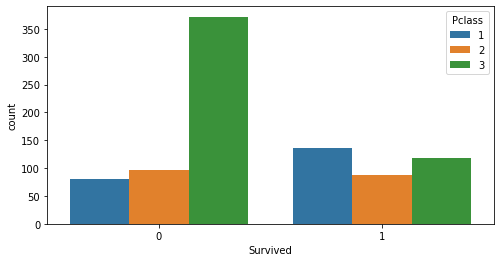

In [12]:
plt.figure(figsize=(8, 4))
sns.countplot("Survived", hue = "Pclass", data = data_train);

Note:-
We can see that Survival rate in Pclass 1 is higher than Pclass 2 and Pclass 3.

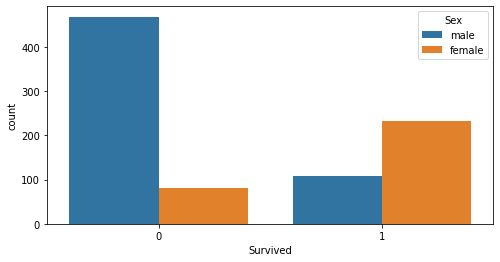

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot("Survived", hue = "Sex", data = data_train);

Note:-
The survival rate of female is higher than the male.

## Treating Missing values 

In [14]:
print("Mean age for male of data_Train: ", data_train[data_train["Sex"] == "male"]["Age"].mean())
print("Mean age for female of data_train: ",data_train[data_train["Sex"] == "female"]["Age"].mean())

Mean age for male of data_Train:  30.72664459161148
Mean age for female of data_train:  27.915708812260537


In [15]:
# Defining a function to fill NA values in Age column using the mean age of Male in their respective 
# Pclass and same for the female

def Fill(cols):
    age = cols[0]
    sex = cols[1]
    pclass = cols[2]
    
    if pd.isnull(age):
        if (sex == "male") & (pclass == 1):
            return data_train[(data_train["Sex"] == "male") & (data_train["Pclass"] == 1)]["Age"].mean()
        
        if (sex == "male") & (pclass == 2):
            return data_train[(data_train["Sex"] == "male") & (data_train["Pclass"] == 2)]["Age"].mean()
        
        if (sex == "male") & (pclass == 3):
            return data_train[(data_train["Sex"] == "male") & (data_train["Pclass"] == 3)]["Age"].mean()
        
        if (sex == "female") & (pclass == 1):
            return data_train[(data_train["Sex"] == "female") & (data_train["Pclass"] == 1)]["Age"].mean()
        
        if (sex == "female") & (pclass == 2):
            return data_train[(data_train["Sex"] == "female") & (data_train["Pclass"] == 2)]["Age"].mean()
        
        if (sex == "female") & (pclass == 3):
            return data_train[(data_train["Sex"] == "female") & (data_train["Pclass"] == 3)]["Age"].mean()
        
    else:
        return age

In [16]:
# Filling the missing values in Age and Embarked by mode("S") in data_train
data_train["Age"] = data_train[["Age", "Sex", "Pclass"]].apply(Fill, axis = 1)
data_train.Embarked = data_train.Embarked.fillna("S")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [17]:
# Filling the missing values in Age and Fare by mean of data_test.
data_test["Age"] = data_test[["Age", "Sex", "Pclass"]].apply(Fill, axis = 1)
data_test["Fare"] = data_test["Fare"].fillna(np.mean(data_test["Fare"]))
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


## Visualization (For Numerical Variables)

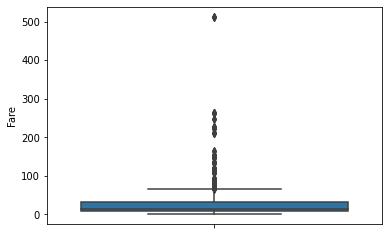

In [18]:
# We can see outliers
sns.boxplot(y = "Fare", data = data_train);  

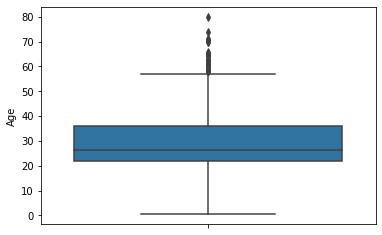

In [19]:
# We need some transformation
sns.boxplot(y = "Age", data = data_train);   

## Visualization (For Categorical Variables)

<AxesSubplot:xlabel='Sex', ylabel='count'>

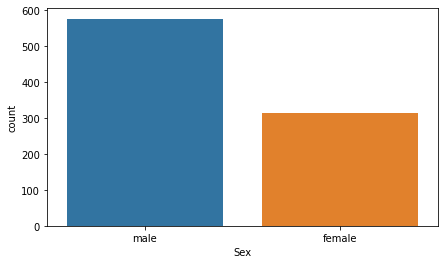

In [20]:
plt.figure(figsize=(7, 4))
sns.countplot(x = "Sex", data = data_train)

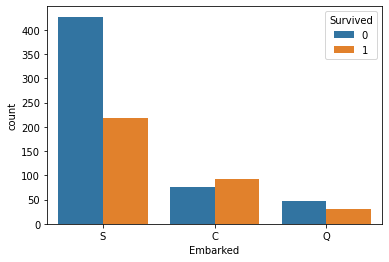

In [21]:
sns.countplot(x = "Embarked", hue = "Survived", data = data_train);

<AxesSubplot:xlabel='Survived', ylabel='count'>

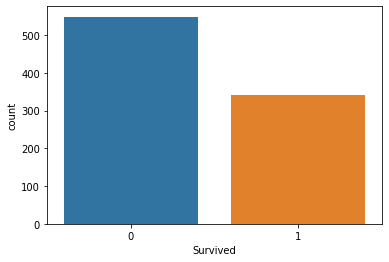

In [22]:
sns.countplot(x = "Survived", data = data_train)

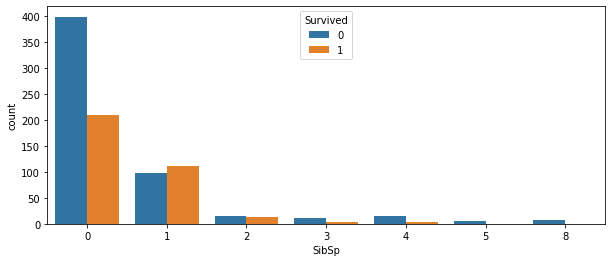

In [23]:
plt.figure(figsize=(10, 4))
sns.countplot(x = "SibSp", hue = "Survived", data = data_train);

<AxesSubplot:xlabel='Parch', ylabel='count'>

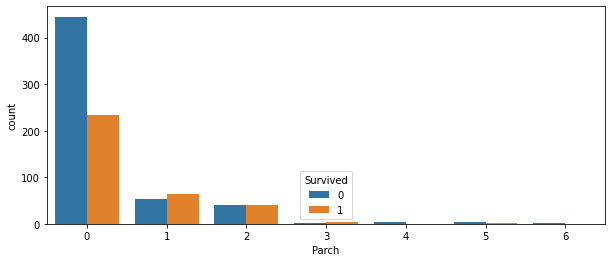

In [24]:
plt.figure(figsize=(10, 4))
sns.countplot(x = "Parch", hue = "Survived", data = data_train)

In [25]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

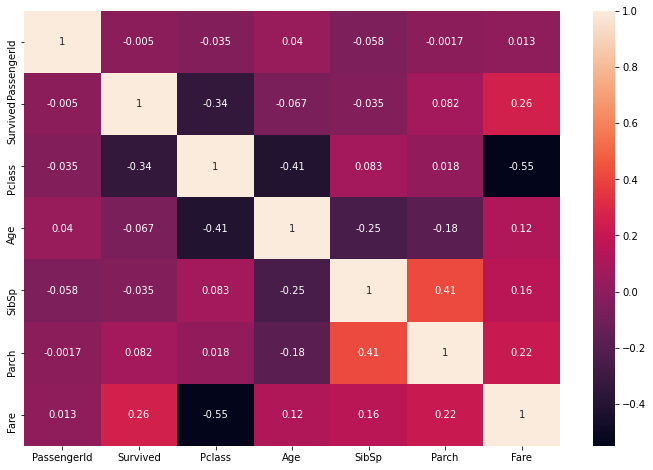

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(data_train.corr(), annot = True);

Note:-
There is a Negative co-relation between the Pclass and Survived which means lower the Pclass, the higher is the survival rate.

# For Train Data

In [27]:
X_train = data_train.drop(["Survived", "Name", "Ticket", "PassengerId"], axis = 1)
X_train = pd.get_dummies(X_train)
X_train = X_train.drop(["Sex_female", "Embarked_Q"], axis = 1)
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,1,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [28]:
y_train = data_train["Survived"]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

# For Test Data

In [29]:
X_test = data_test.drop(["Name", "Ticket", "PassengerId"], axis = 1)
X_test = pd.get_dummies(X_test)
X_test = X_test.drop(["Sex_female", "Embarked_Q"], axis = 1)
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S
0,3,34.5,0,0,7.8292,1,0,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,0,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


# Logistic Regression

In [30]:
clf_lr = LogisticRegression()

In [31]:
clf_lr.fit(X_train, y_train)

LogisticRegression()

In [32]:
clf_lr.coef_

array([[-0.94451783, -0.03524214, -0.30996632, -0.17723729,  0.00324415,
        -2.70144693,  1.19785493,  0.6867916 ]])

In [33]:
clf_lr.intercept_

array([3.71863817])

In [34]:
y_train_pred = clf_lr.predict(X_train)
y_test_pred = clf_lr.predict(X_test)

In [35]:
confusion_matrix(y_train, y_train_pred)

array([[481,  68],
       [107, 235]])

# Linear Discrimant Analysis

In [36]:
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [37]:
y_train_pred_lda = clf_lda.predict(X_train)
y_test_pred_lda = clf_lda.predict(X_test)

In [38]:
confusion_matrix(y_train, y_train_pred_lda)

array([[475,  74],
       [102, 240]])

# Random Forest Classifier

In [39]:
# Got the best Parameters from Grid Search CV given below
clf_rfc = RandomForestClassifier(criterion = "gini", max_depth = 9, max_features = "log2", 
                                 min_samples_split = 5, n_estimators = 50, random_state = 0)

In [40]:
clf_rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features='log2', min_samples_split=5,
                       n_estimators=50, random_state=0)

In [41]:
y_train_pred_rfc = clf_rfc.predict(X_train)
y_test_pred_rfc = clf_rfc.predict(X_test)

In [42]:
confusion_matrix(y_train, y_train_pred_rfc)

array([[531,  18],
       [ 60, 282]])

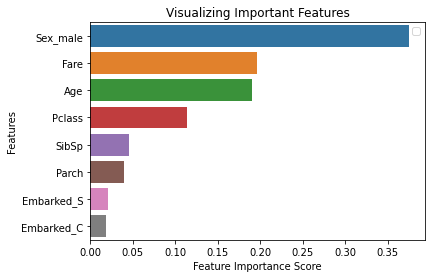

In [43]:
feature_imp = pd.Series(clf_rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Grid Search CV

In [44]:
clf_rfc1 = RandomForestClassifier(random_state = 0)

In [45]:
params_grid = {"n_estimators": [0, 10, 30, 50, 70, 90, 100],
               "min_samples_split": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_features": ["auto", "sqrt", "log2"],
               "criterion": ["gini", "entopy"]}

In [46]:
grid_search = GridSearchCV(clf_rfc1, params_grid, n_jobs = -1, cv = 5)

In [47]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entopy'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10],
                         'n_estimators': [0, 10, 30, 50, 70, 90, 100]})

In [48]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'log2',
 'min_samples_split': 5,
 'n_estimators': 50}

# Performance Metrics

## For Logistic Regression(LR)

In [49]:
print("Precision Score for Training data: ", precision_score(y_train, y_train_pred))
print("Recall Score for Training data: ", recall_score(y_train, y_train_pred))
print("ROC Score for Training data: ", roc_auc_score(y_train, y_train_pred))

Precision Score for Training data:  0.7755775577557755
Recall Score for Training data:  0.6871345029239766
ROC Score for Training data:  0.7816364682197297


## For Linear Discriminant Analysis(LDA)

In [50]:
print("Precision Score for Training data: ", precision_score(y_train, y_train_pred_lda))
print("Recall Score for Training data: ", recall_score(y_train, y_train_pred_lda))
print("ROC Score for Training data: ", roc_auc_score(y_train, y_train_pred_lda))

Precision Score for Training data:  0.7643312101910829
Recall Score for Training data:  0.7017543859649122
ROC Score for Training data:  0.7834819288658805


## For Random Forest Classifier

In [51]:
print("Precision Score for Training data: ", precision_score(y_train, y_train_pred_rfc))
print("Recall Score for Training data: ", recall_score(y_train, y_train_pred_rfc))
print("ROC Score for Training data: ", roc_auc_score(y_train, y_train_pred_rfc))

Precision Score for Training data:  0.94
Recall Score for Training data:  0.8245614035087719
ROC Score for Training data:  0.8958872591314351


# Creating a prediction CSV file for Test data

In [52]:
# For Logistic Regression
#res = pd.DataFrame([data_test["PassengerId"], y_test_pred], index = ["PassengerId", "Survived"]).T 
#res.to_csv('mycsvfile.csv',index=False)   # creating a csv file for the prediction data

In [53]:
# For Linear Discriminant Analysis
#res = pd.DataFrame([data_test["PassengerId"], y_test_pred_lda], index = ["PassengerId", "Survived"]).T 
#res.to_csv('mycsvfile5.csv',index=False)   # creating a csv file for the prediction data

In [54]:
# For Random Forest Classifier
res = pd.DataFrame([data_test["PassengerId"], y_test_pred_rfc], index = ["PassengerId", "Survived"]).T 
res.to_csv('submission.csv',index=False)   # creating a csv file for the prediction data

In [55]:
res.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


# Refrences
- Handling Missing Values: https://www.youtube.com/watch?v=P_iMSYQnqac
- Logistic Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- Linear Discriminant Analysis:https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
- Random Forest Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
- GridSearch CV: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
